In [1]:
%config Completer.use_jedi = False

In [94]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns 
import collections
import matplotlib.pyplot as plt

In [3]:
H=nx.read_gml('Author_keywords707.gml')

In [4]:
H.number_of_edges()

1851

In [5]:
H.number_of_nodes()

707

In [7]:
from cdlib import algorithms


Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'karateclub', 'leidenalg', 'graph_tool'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap', 'leidenalg'}


# Markov clustering

In [8]:
coms1 = algorithms.markov_clustering(H,expansion=7,inflation=4)

In [9]:
coms2 = algorithms.markov_clustering(H,expansion=11,inflation=13)

# Expectation maximization

In [10]:
coms3 = algorithms.em(H, k=4)

In [11]:
coms4 = algorithms.em(H, k=7)

In [12]:
coms5 = algorithms.em(H, k=12)

# Walk trap

In [13]:
coms6 = algorithms.walktrap(H)

# louvain community

In [14]:
coms7 = algorithms.louvain(H,  resolution=1.0)

In [15]:
coms8 = algorithms.louvain(H,  resolution=1.25)

# Girvan newman communities

In [17]:
from networkx.algorithms import community

In [18]:
communities_generator = community.girvan_newman(H)

In [19]:
test=[]
for i in range(50):
    test.append(next(communities_generator))

In [21]:
len(test[0])

2

In [22]:
coms9=test[30]

In [23]:
coms10=test[40]

# fluid community 

In [25]:
from cdlib.algorithms import async_fluid

In [26]:
coms11 = async_fluid(H,k=9)

In [27]:
coms12 = async_fluid(H,k=15)

# Inter community similarity 

## Adjusted Mutual Information

In [28]:
from cdlib import evaluation

In [29]:
evaluation.adjusted_mutual_information(coms1,coms2)

MatchingResult(score=0.7428814031936485, std=None)

In [32]:
"'coms',"*12

"'coms','coms','coms','coms','coms','coms','coms','coms','coms','coms','coms','coms',"

In [60]:
c=[coms1,coms2,coms3,coms4,coms5,coms6,coms7,coms8,coms9,coms10,coms11,coms12]

In [39]:
for i in c:
    for j in c:
        try:
            print(evaluation.adjusted_mutual_information(i,j))
        except:
            print('fuck happen')
    break        

MatchingResult(score=1.0, std=None)
MatchingResult(score=0.7428814031936485, std=None)
MatchingResult(score=0.3224466224129912, std=None)
MatchingResult(score=0.3307707024055999, std=None)
MatchingResult(score=0.3389835673526795, std=None)
MatchingResult(score=0.604683432848583, std=None)
MatchingResult(score=0.47347778512088384, std=None)
MatchingResult(score=0.45070336079907813, std=None)
fuck happen
fuck happen
MatchingResult(score=0.34081884075605634, std=None)
MatchingResult(score=0.33381701030419914, std=None)


In [42]:
com = algorithms.girvan_newman(H, level=10)

In [51]:
fit=[]
for i in range(2,50):
    com = algorithms.girvan_newman(H, level=i)
    fit.append(nx_comm.modularity(H, com.communities))

In [45]:
import networkx.algorithms.community as nx_comm

In [46]:
nx_comm.modularity(H, com.communities)

0.09523711539398882

<AxesSubplot:>

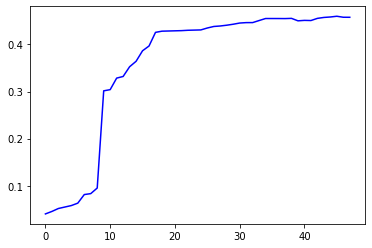

In [52]:
sns.lineplot([i for i in range(len(fit))],fit,color='b')

In [57]:
coms9 = algorithms.girvan_newman(H, level=30)

In [58]:
coms10 = algorithms.girvan_newman(H, level=40)

In [64]:
ami=[]
for i in c:
    for j in c:
            ami.append(evaluation.adjusted_mutual_information(i,j))

     

In [70]:
ami_=[i[0] for i in ami]

In [74]:
ami_mat=np.reshape(ami_,[12,12])

MatchingResult(score=0.32073009264541, std=None)

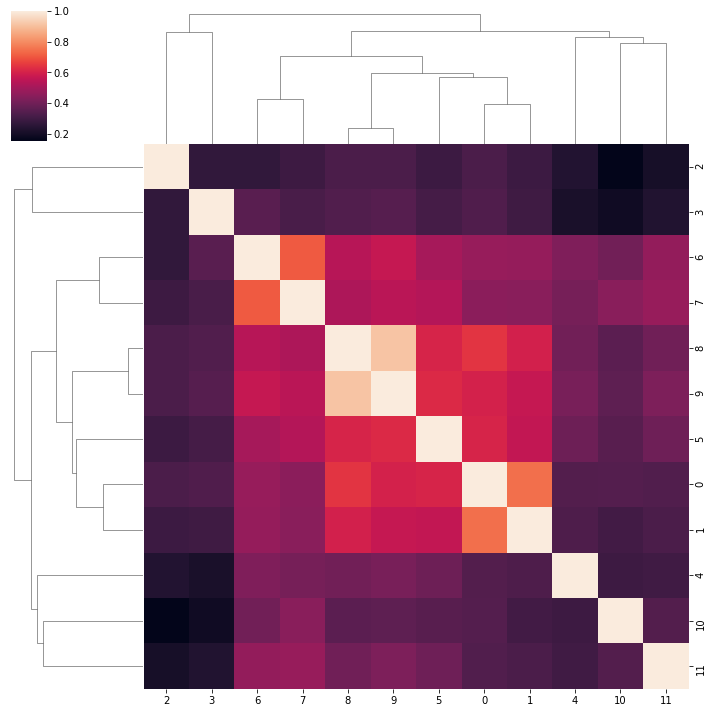

In [75]:
sns.clustermap(ami_mat)

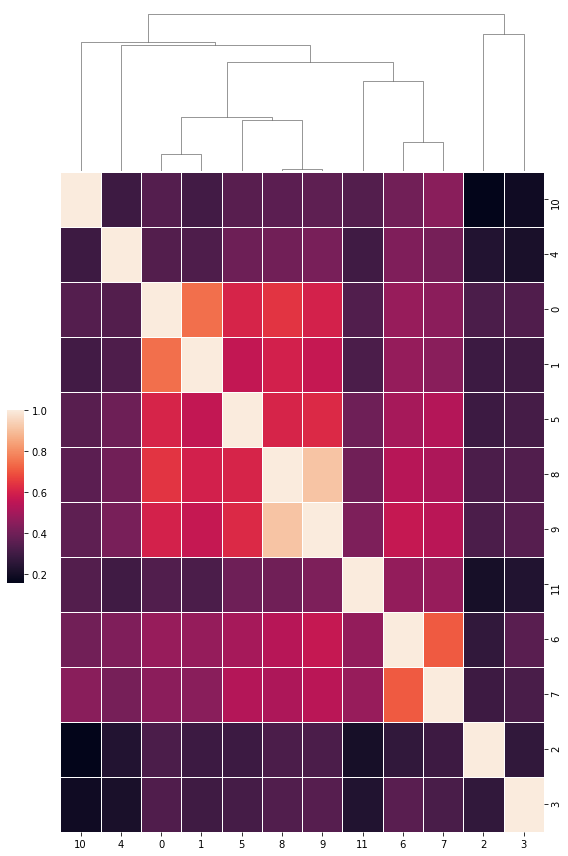

In [84]:

g=sns.clustermap(ami_mat,metric='correlation', dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.5, figsize=(8, 12))
g.ax_row_dendrogram.remove()

In [85]:
c

In [86]:
df_ami=pd.DataFrame(ami_mat,columns=['coms1','coms2','coms3','coms4','coms5','coms6','coms7','coms8','coms9','coms10','coms11','coms12'])

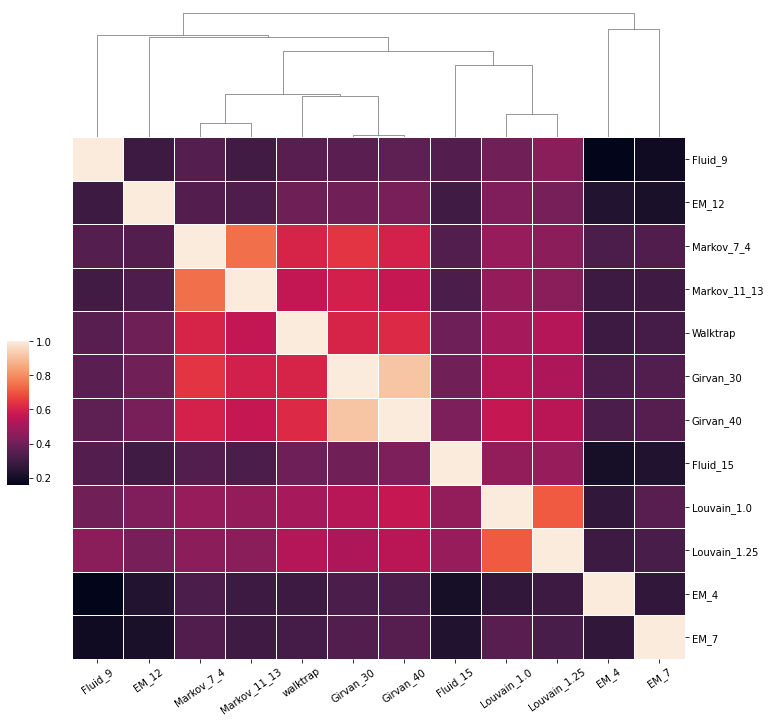

In [118]:
ax=sns.clustermap(df_ami,metric='correlation', dendrogram_ratio=(.1, .2),cbar_pos=(.02, .32, .03, .2),linewidths=.5)
ax.ax_row_dendrogram.remove()
ax.ax_heatmap.axes.set_yticklabels(['Fluid_9','EM_12','Markov_7_4','Markov_11_13','Walktrap','Girvan_30','Girvan_40','Fluid_15','Louvain_1.0','Louvain_1.25','EM_4','EM_7'],rotation=0)

ax.ax_heatmap.axes.set_xticklabels(['Fluid_9','EM_12','Markov_7_4','Markov_11_13','walktrap','Girvan_30','Girvan_40','Fluid_15','Louvain_1.0','Louvain_1.25','EM_4','EM_7'],rotation=35)
ax.savefig('clustermap of selected community AMI.jpeg',dpi=300)

In [104]:
for l in ax.ax_heatmap.axes.get_yticklabels():
    print(l)

Text(1, 0.5, '10')
Text(1, 1.5, '4')
Text(1, 2.5, '0')
Text(1, 3.5, '1')
Text(1, 4.5, '5')
Text(1, 5.5, '8')
Text(1, 6.5, '9')
Text(1, 7.5, '11')
Text(1, 8.5, '6')
Text(1, 9.5, '7')
Text(1, 10.5, '2')
Text(1, 11.5, '3')


## Normalized F1 score 

In [175]:
nf1=[]
for i in c:
    for j in c:
            nf1.append(evaluation.nf1(i,j))

In [176]:
nf1_=[i[0] for i in nf1]

In [177]:
nf1_mat=np.reshape(nf1_,[12,12])

In [178]:
df_nf=pd.DataFrame(nf1_mat,columns=['Markov_7_4','Markov_11_13','EM_4','EM_7','EM_12','walktrap','Louvain_1.0','Louvain_1.25','Girvan_30','Girvan_40','Fluid_9','Fluid_15'])

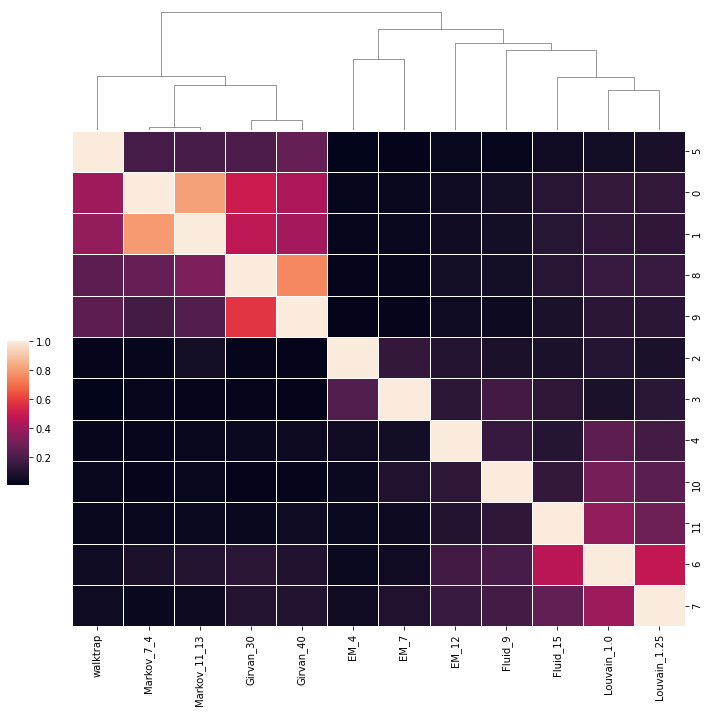

In [179]:
ax=sns.clustermap(df_nf,metric='correlation', dendrogram_ratio=(.1, .2),cbar_pos=(.02, .32, .03, .2),linewidths=.5)
ax.ax_row_dendrogram.remove()

In [180]:
new_label=[]
for l in ax.ax_heatmap.axes.get_xticklabels():
    new_label.append(l.get_text())

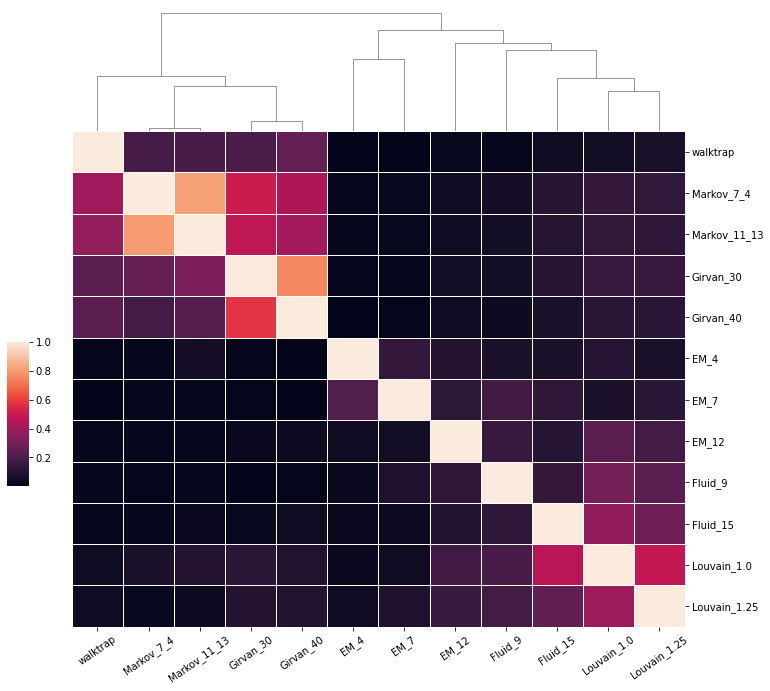

In [181]:
ax=sns.clustermap(df_nf,metric='correlation', dendrogram_ratio=(.1, .2),cbar_pos=(.02, .32, .03, .2),linewidths=.5)
ax.ax_row_dendrogram.remove()
ax.ax_heatmap.axes.set_yticklabels(new_label,rotation=0)
ax.ax_heatmap.axes.set_xticklabels(new_label,rotation=35)
ax.savefig('clustermap of selected community nf1.jpeg',dpi=300)

## Adjusted rand index

In [168]:
ari=[]
for i in c:
    for j in c:
            ari.append(evaluation.adjusted_rand_index(i,j))

In [169]:
ari_=[i[0] for i in ari]

In [170]:
ari_mat=np.reshape(ari_,[12,12])

In [171]:
df_ari=pd.DataFrame(ari_mat,columns=['Markov_7_4','Markov_11_13','EM_4','EM_7','EM_12','walktrap','Louvain_1.0','Louvain_1.25','Girvan_30','Girvan_40','Fluid_9','Fluid_15'])

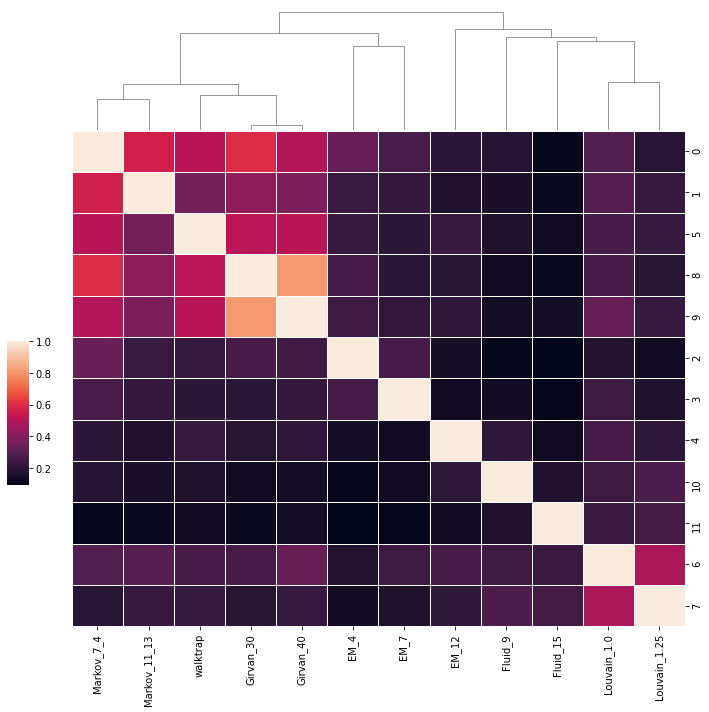

In [172]:
ax=sns.clustermap(df_ari,metric='correlation', dendrogram_ratio=(.1, .2),cbar_pos=(.02, .32, .03, .2),linewidths=.5)
ax.ax_row_dendrogram.remove()

In [173]:
new_label=[]
for l in ax.ax_heatmap.axes.get_xticklabels():
    new_label.append(l.get_text())

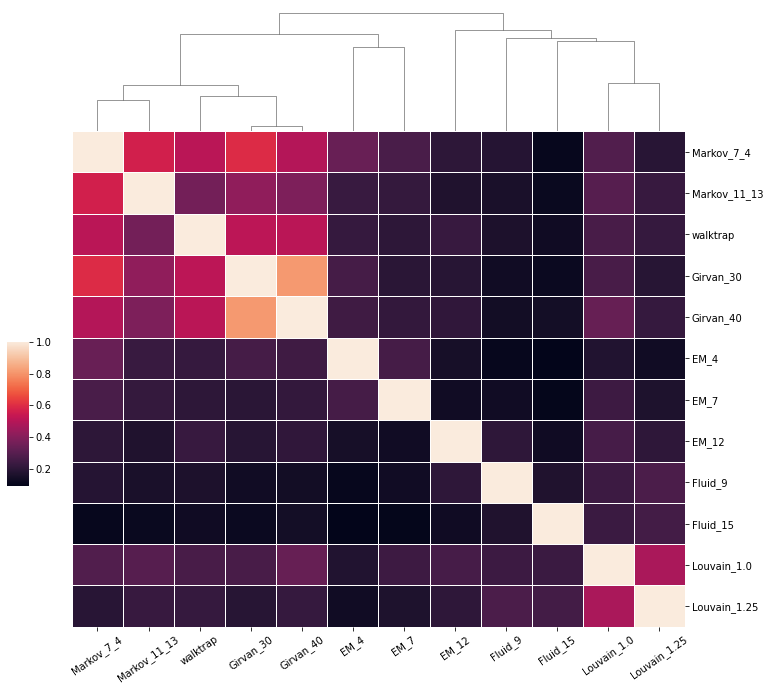

In [174]:
ax=sns.clustermap(df_ari,metric='correlation', dendrogram_ratio=(.1, .2),cbar_pos=(.02, .32, .03, .2),linewidths=.5)
ax.ax_row_dendrogram.remove()
ax.ax_heatmap.axes.set_yticklabels(new_label,rotation=0)
ax.ax_heatmap.axes.set_xticklabels(new_label,rotation=35)
ax.savefig('clustermap of selected community ari.jpeg',dpi=300)

## Variation_of_information

In [160]:
ari=[]
for i in c:
    for j in c:
            ari.append(evaluation.variation_of_information(i,j))

In [161]:
ari_=[i[0] for i in ari]

In [162]:
ari_mat=np.reshape(ari_,[12,12])

In [163]:
df_ari=pd.DataFrame(ari_mat,columns=['Markov_7_4','Markov_11_13','EM_4','EM_7','EM_12','walktrap','Louvain_1.0','Louvain_1.25','Girvan_30','Girvan_40','Fluid_9','Fluid_15'])

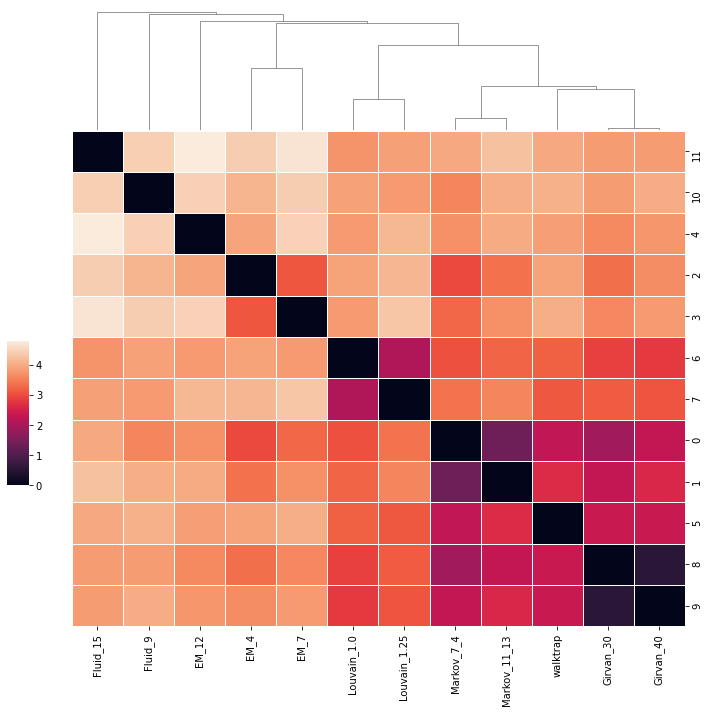

In [164]:
ax=sns.clustermap(df_ari,metric='correlation', dendrogram_ratio=(.1, .2),cbar_pos=(.02, .32, .03, .2),linewidths=.5)
ax.ax_row_dendrogram.remove()

In [165]:
new_label=[]
for l in ax.ax_heatmap.axes.get_xticklabels():
    new_label.append(l.get_text())

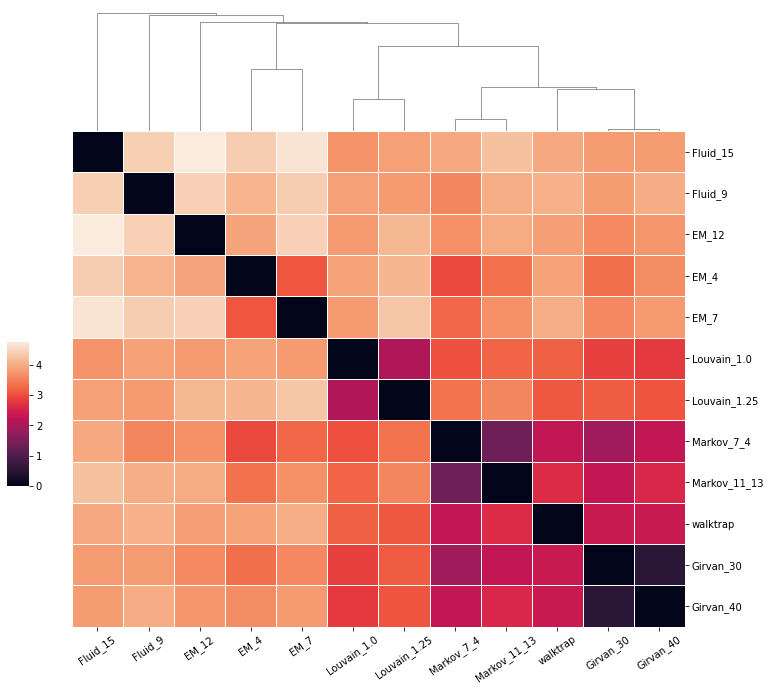

In [167]:
ax=sns.clustermap(df_ari,metric='correlation', dendrogram_ratio=(.1, .2),cbar_pos=(.02, .32, .03, .2),linewidths=.5)
ax.ax_row_dendrogram.remove()
ax.ax_heatmap.axes.set_yticklabels(new_label,rotation=0)
ax.ax_heatmap.axes.set_xticklabels(new_label,rotation=35)
ax.savefig('clustermap of selected community voi.jpeg',dpi=300)

## Selected community size ecd plot 

In [182]:
c_name=['Markov_7_4','Markov_11_13','EM_4','EM_7','EM_12','walktrap','Louvain_1.0','Louvain_1.25','Girvan_30','Girvan_40','Fluid_9','Fluid_15']

In [183]:
ecd_data=[]
for i,j in enumerate(c):
        for k in j.communities:
            ecd_data.append([len(k),c_name[i]])

In [184]:
len(ecd_data)

268

In [185]:
df_ecdf=pd.DataFrame(ecd_data,columns=['c_len','Name of community'])

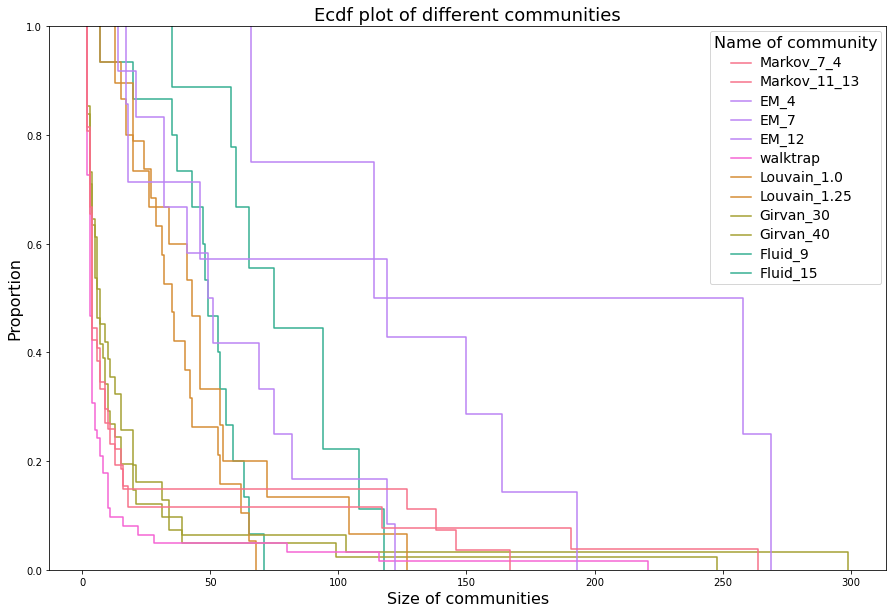

In [205]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.ecdfplot(data=df_ecdf, x="c_len", hue="Name of community",complementary=True,palette=['#f77189','#f77189','#bb83f4','#bb83f4','#bb83f4','#f564d4','#d58c32','#d58c32','#a4a031','#a4a031','#34ae91','#34ae91'])
ax.set_ylabel("Proportion",fontsize=16)
ax.set_xlabel("Size of communities",fontsize=16)
sns.move_legend(ax, "upper right",)
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='16')
ax.set_title('Ecdf plot of different communities',fontsize=18)
plt.savefig('Ecdf plot of different communities.jpeg',dpi=300)

In [192]:
print(sns.color_palette("pastel6").as_hex())

['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#fffea3', '#b9f2f0']


In [193]:
c_name

['Markov_7_4',
 'Markov_11_13',
 'EM_4',
 'EM_7',
 'EM_12',
 'walktrap',
 'Louvain_1.0',
 'Louvain_1.25',
 'Girvan_30',
 'Girvan_40',
 'Fluid_9',
 'Fluid_15']

In [ ]:
print(sns.color_palette("pastel6").as_hex())

In [195]:
sns.color_palette("husl", 9)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8369430560927636, 0.5495828952802333, 0.1952683223448124),
 (0.6430915736746491, 0.6271955086583126, 0.19381135329796756),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20582072623426667, 0.6842209016721069, 0.5675558225732941),
 (0.2151139535594307, 0.6700707833028816, 0.7112365203426209),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 (0.9614880299080136, 0.3909885385134758, 0.8298287106954371)]

In [199]:
len(['#f77189','#f77189','#bb83f4','#bb83f4','#bb83f4','#f564d4','#d58c32','#d58c32','#a4a031','#a4a031','#34ae91','#34ae91'])

10

In [197]:
print(sns.color_palette("husl", 9).as_hex())

['#f77189', '#d58c32', '#a4a031', '#50b131', '#34ae91', '#37abb5', '#3ba3ec', '#bb83f4', '#f564d4']
